<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.06.- EDA - Regression Analysis</font>

<font color='steelblue'>Regression Analysis.</font>


## <font color='steelblue'>Tasks</font>

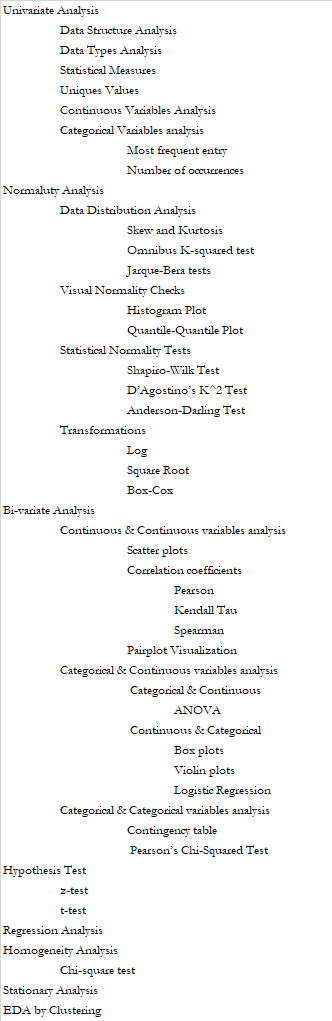
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import dabl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

C:\Users\Eugenio\Anaconda3\envs\kapreolus\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Regression Analysis

### Simple Linear Regression with Statsmodels Library

<font color='tomato'>Select columns</font>

In [4]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data['Age']
# Variable dependiente
y=data['Pedigree']

# Etiquetas para los gráficos
EtiquetaX='Age'
Etiquetay='Pedigree'

<font color='darkgrey'><b>Operation</font>

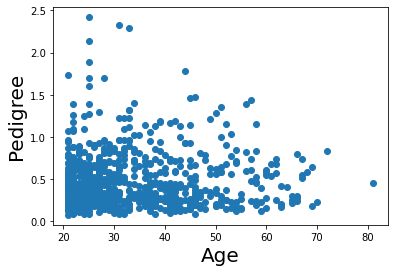

In [7]:
# plot data in order to understand it better and see if there is a relationship to be found.
plt.scatter(X,y)
plt.xlabel(EtiquetaX, fontsize = 20)
plt.ylabel(Etiquetay, fontsize = 20)
plt.show()

In [10]:
# Adding a Constant and Calculate the ordinary least squares regression, or OLS
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Pedigree   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8638
Date:                Fri, 18 Sep 2020   Prob (F-statistic):              0.353
Time:                        12:15:01   Log-Likelihood:                -240.44
No. Observations:                 768   AIC:                             484.9
Df Residuals:                     766   BIC:                             494.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4404      0.036     12.279      0.000       0.370       0.511
Age            0.0009      0.001      0.929      0.353      -0.001       0.003
==============================================================================
Omnibus:                      323.271   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1480.186
Skew:                           1.921   Prob(JB):                         0.00
Kurtosis:                       8.612   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='tomato'>Select Coefs</font>

In [2]:
''' INTRO: ESPECIFICAR coefs DE LA TABLA ANTERIOR'''
# yhat = coef.var_indep*X + coef.const
yhat = 0.0009*X + 0.4404

NameError: name 'X' is not defined

<font color='darkgrey'><b>Operation</font>

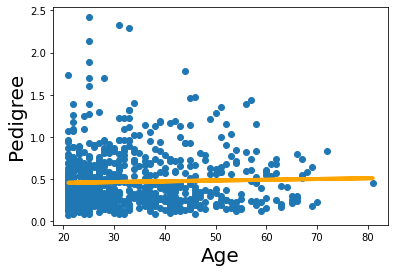

In [11]:
# Plotting the Regression line
plt.scatter(X,y)
fig = plt.plot(X,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel(EtiquetaX, fontsize = 20)
plt.ylabel(Etiquetay, fontsize = 20)
plt.show()

**PREDICCION**
En esta fase, el objetivo no es realizar predicciones, solamente realizar el análisis.
Se adjunta el código para predecir para tenerlo ya escrito y documentado.

In [12]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(X1), sep='\n')

predicted response:
0      0.487723
1      0.469757
2      0.470703
3      0.460302
4      0.471649
         ...   
763    0.500015
764    0.465975
765    0.468812
766    0.484886
767    0.462193
Length: 768, dtype: float64
predicted response:
0      0.487723
1      0.469757
2      0.470703
3      0.460302
4      0.471649
         ...   
763    0.500015
764    0.465975
765    0.468812
766    0.484886
767    0.462193
Length: 768, dtype: float64


### Multiple Linear Regression with Statsmodels Library

<font color='tomato'>Select columns</font>

In [20]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data.drop(['NPregnant','Plasma', 'Triceps', 'Serum', 'Pedigree', 'Target'], axis=1)
# Variable dependiente
y=data['Pedigree']

<font color='darkgrey'><b>Operation</font>

In [15]:
X

,Diastolic,Body,Age
0,72,33.6,50
1,66,26.6,31
2,64,23.3,32
3,66,28.1,21
4,40,43.1,33
...,...,...,...
763,76,32.9,63
764,70,36.8,27
765,72,26.2,30
766,60,30.1,47


In [16]:
# Adding a Constant and Calculate the ordinary least squares regression, or OLS
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Pedigree   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.362
Date:                Fri, 18 Sep 2020   Prob (F-statistic):            0.00117
Time:                        12:15:34   Log-Likelihood:                -232.88
No. Observations:                 768   AIC:                             473.8
Df Residuals:                     764   BIC:                             492.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2609      0.063      4.124      0.000       0.137       0.385
Diastolic  -9.676e-05      0.001     -0.147      0.883      -0.001       0.001
Body           0.0059      0.002      3.781      0.000       0.003       0.009
Age            0.0008      0.001      0.808      0.420      -0.001       0.003
==============================================================================
Omnibus:                      311.872   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.683
Skew:                           1.871   Prob(JB):                    1.50e-290
Kurtosis:                       8.263   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.020620560588726744
adjusted coefficient of determination: 0.01677482980569822
regression coefficients: const        0.260869
Diastolic   -0.000097
Body         0.005932
Age          0.000840
dtype: float64


**PREDICCION**
En esta fase, el objetivo no es realizar predicciones, solamente realizar el análisis.
Se adjunta el código para predecir para tenerlo ya escrito y documentado.

In [18]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(X1), sep='\n')

predicted response:
0      0.495202
1      0.438306
2      0.419763
3      0.438808
4      0.540381
         ...   
763    0.501577
764    0.495069
765    0.434513
766    0.473082
767    0.453744
Length: 768, dtype: float64
predicted response:
0      0.495202
1      0.438306
2      0.419763
3      0.438808
4      0.540381
         ...   
763    0.501577
764    0.495069
765    0.434513
766    0.473082
767    0.453744
Length: 768, dtype: float64


### Simple Linear Regression with Scikit-Learn Library

𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥

The goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function. The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis. It is the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the slope of the estimated regression line.

In [19]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<font color='tomato'>Select columns</font>

In [20]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data['Age']
# Variable dependiente
y=data['Pedigree']

# Etiquetas para los gráficos
EtiquetaX='Age'
Etiquetay='Pedigree'

<font color='darkgrey'><b>Operation</font>

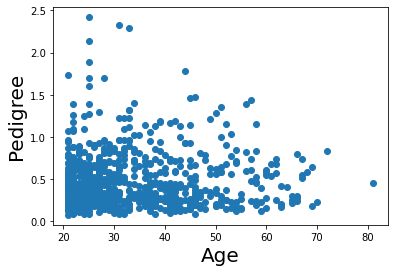

In [21]:
# plot data in order to understand it better and see if there is a relationship to be found.
plt.scatter(X,y)
plt.xlabel(EtiquetaX, fontsize = 20)
plt.ylabel(Etiquetay, fontsize = 20)
plt.show()

In [22]:
# X is required to be two-dimensional, or to be more precise, to have one column and as many rows as 
# necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.  
X=np.array(X).reshape((-1, 1))

In [25]:
# Creates the variable model as the instance of LinearRegression.  
model = LinearRegression().fit(X, y)

In [26]:
# Fits the model.
# Calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) 
# as the arguments. 
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Obtain the coefficient of determination (𝑅²) 
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0011263616923467001


In [28]:
# Coefficient, 𝑏₀ and .coef_, which represents 𝑏₁ 
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.4404455650133789
slope: [0.00094554]


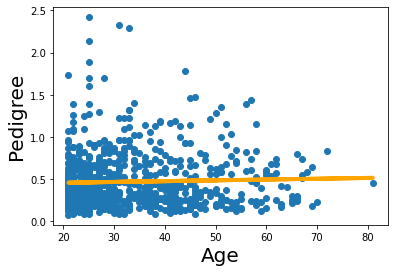

In [29]:
# Plotting the Regression line
plt.scatter(X,y)
yhat = model.coef_*X + model.intercept_
fig = plt.plot(X,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel(EtiquetaX, fontsize = 20)
plt.ylabel(Etiquetay, fontsize = 20)
plt.show()

**PREDICCION**
En esta fase, el objetivo no es realizar predicciones, solamente realizar el análisis.
Se adjunta el código para predecir para tenerlo ya escrito y documentado.

In [30]:
# Predecimos los valores para X. Usamos la misma X del entrenamiento de forma que la predicción
# debería ser la y que teniamos. Para predecir nuevos valores sería pasarle otra X distinta.
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.48772279 0.46975745 0.47070299 0.460302   0.47164853 0.4688119
 0.46502972 0.46786636 0.49055942 0.49150497 0.4688119  0.47259408
 0.4943416  0.49623269 0.48866834 0.47070299 0.46975745 0.46975745
 0.47164853 0.47070299 0.46597527 0.48772279 0.47921289 0.46786636
 0.48866834 0.47921289 0.48110398 0.46124754 0.4943416  0.47637626
 0.49717824 0.46692081 0.46124754 0.46692081 0.48299507 0.47164853
 0.47353962 0.48394061 0.46597527 0.49339606 0.46502972 0.47543071
 0.4858317  0.49150497 0.47826735 0.46408418 0.46786636 0.46124754
 0.46975745 0.46313863 0.46124754 0.46502972 0.4688119  0.49528715
 0.48015843 0.460302   0.47921289 0.46975745 0.48204952 0.46124754
 0.460302   0.4773218  0.47448517 0.46313863 0.48015843 0.47070299
 0.47637626 0.49150497 0.46408418 0.46597527 0.46692081 0.46502972
 0.48015843 0.46219309 0.46124754 0.46124754 0.47921289 0.46597527
 0.46502972 0.46313863 0.46124754 0.46124754 0.47448517 0.46124754
 0.47543071 0.46597527 0.48299507 0.4650297

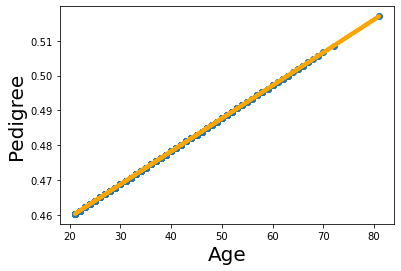

In [31]:
# Plotting the Regression line with y_pred
plt.scatter(X,y_pred)
yhat = model.coef_*X + model.intercept_
fig = plt.plot(X,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel(EtiquetaX, fontsize = 20)
plt.ylabel(Etiquetay, fontsize = 20)
plt.show()

### Multiple Linear Regression with Scikit-Learn Library

𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂.

Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.

In [32]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<font color='tomato'>Select columns</font>

In [33]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data.drop(['NPregnant','Plasma', 'Diastolic', 'Triceps', 'Serum', 'Pedigree', 'Target'], axis=1)
# Variable dependiente
y=data['Pedigree']

<font color='darkgrey'><b>Operation</font>

In [34]:
X

,Body,Age
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33
...,...,...
763,32.9,63
764,36.8,27
765,26.2,30
766,30.1,47


In [35]:
# Fits the model.
model = LinearRegression().fit(X, y)

𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂.

Obtain the value of 𝑅² using .score() and the values of the estimators of regression coefficients with .intercept_ and .coef_. Again, .intercept_ holds the bias 𝑏₀, while now .coef_ is an array containing 𝑏₁ and 𝑏₂ respectively.

In [36]:
# Get results
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.020592830350411595
intercept: 0.257476687881935
slope: [0.00586722 0.00080299]


**PREDICCION**
En esta fase, el objetivo no es realizar predicciones, solamente realizar el análisis.
Se adjunta el código para predecir para tenerlo ya escrito y documentado.

In [37]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.49476479 0.43843745 0.41987861 0.43920838 0.53685258 0.43176724
 0.46023827 0.48787629 0.47898538 0.30083812 0.50217389 0.50773274
 0.46224878 0.48145643 0.44980346 0.45918899 0.55108809 0.45603911
 0.53802602 0.48617821 0.5097392  0.50532579 0.52391466 0.4509128
 0.51316945 0.47286984 0.52317375 0.41126199 0.4334994  0.48806253
 0.51687602 0.46536458 0.42064954 0.3967181  0.45554652 0.42478865
 0.48037306 0.48744578 0.50328525 0.52011801 0.47783994 0.52304959
 0.4292061  0.56720996 0.45035813 0.52397472 0.45501985 0.43942465
 0.51177771 0.27674843 0.38896655 0.42034117 0.42472657 0.50177543
 0.49479482 0.40928555 0.5115935  0.55695531 0.53043068 0.51863214
 0.27433947 0.48182486 0.43306484 0.42577585 0.4836471  0.45332177
 0.47867498 0.55136847 0.39254896 0.4487201  0.47299197 0.44615694
 0.54583965 0.48188491 0.46289354 0.42006282 0.48167067 0.50035164
 0.53181837 0.42342897 0.40656821 0.27514246 0.45829389 0.4194761
 0.57350769 0.46925537 0.50835151 0.50424243

### Polynomial Regression with Scikit-Learn Library

𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

Polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree 2

<font color='tomato'>Select columns</font>

In [38]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data['Age']
# Variable dependiente
y=data['Pedigree']

''' INTRO: ESPECIFICAR LOS TÍTULOS'''
EtiquetaX='Age'
Etiquetay='Pedigree'

<font color='darkgrey'><b>Operation</font>

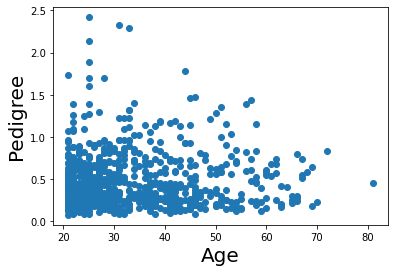

In [39]:
# plot data in order to understand it better and see if there is a relationship to be found.
plt.scatter(X,y)
plt.xlabel(EtiquetaX, fontsize = 20)
plt.ylabel(Etiquetay, fontsize = 20)
plt.show()

In [40]:
# X is required to be two-dimensional, or to be more precise, to have one column and as many rows as 
# necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.  
X=np.array(X).reshape((-1, 1))

**Transform input data**

We need to include 𝑥² (and perhaps other terms) as additional features when implementing polynomial regression. For that reason, you should transform the input array x to contain the additional column(s) with the values of 𝑥² (and eventually more features).

In [43]:
# Transform input data
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)
X_ = transformer.transform(X)
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [44]:
# Create a model and fit it
model = LinearRegression().fit(X_, y)

**Get results**

.score() returns 𝑅². Its first argument is also the modified input x_, not x. The values of the weights are associated to .intercept_ and .coef_: .intercept_ represents 𝑏₀, while .coef_ references the array that contains 𝑏₁ and 𝑏₂ respectively.

In [45]:
# Get results
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.002784063664201364
intercept: 0.3226733389354751
coefficients: [ 7.61816735e-03 -8.36886707e-05]


**PREDICCION**
En esta fase, el objetivo no es realizar predicciones, solamente realizar el análisis.
Se adjunta el código para predecir para tenerlo ya escrito y documentado.

In [46]:
y_pred = model.predict(X_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.49436003 0.47841171 0.4807575  0.44574815 0.4829359  0.47589856
 0.46417215 0.47321802 0.49135473 0.49001821 0.47589856 0.48494693
 0.48500439 0.48082495 0.49352564 0.4807575  0.47841171 0.47841171
 0.4829359  0.4807575  0.46735482 0.49436003 0.49433754 0.47321802
 0.49352564 0.49433754 0.49551418 0.4497677  0.48500439 0.49131726
 0.47848417 0.47037011 0.4497677  0.47037011 0.49602131 0.4829359
 0.48679057 0.49602381 0.46735482 0.48684304 0.46417215 0.48997574
 0.49552667 0.49001821 0.49349816 0.4608221  0.47321802 0.4497677
 0.47841171 0.45730468 0.4497677  0.46417215 0.47589856 0.48299836
 0.49500955 0.44574815 0.49433754 0.47841171 0.49585144 0.4497677
 0.44574815 0.4924914  0.48846685 0.45730468 0.49500955 0.4807575
 0.49131726 0.49001821 0.4608221  0.46735482 0.47037011 0.46417215
 0.49500955 0.45361988 0.4497677  0.4497677  0.49433754 0.46735482
 0.46417215 0.45730468 0.4497677  0.4497677  0.48846685 0.4497677
 0.48997574 0.46735482 0.49602131 0.46417215 0.

### Polynomial Regression (multiple varibles) with Scikit-Learn Library

𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂²

In [47]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<font color='tomato'>Select columns</font>

In [48]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data.drop(['NPregnant','Plasma', 'Diastolic', 'Triceps', 'Serum', 'Pedigree', 'Target'], axis=1)
# Variable dependiente
y=data['Pedigree']

<font color='darkgrey'><b>Operation</font>

In [49]:
X

,Body,Age
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33
...,...,...
763,32.9,63
764,36.8,27
765,26.2,30
766,30.1,47


In [50]:
# Transform input data
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

# Create a model and fit it
model = LinearRegression().fit(X_, y)

# Get results
r_sq = model.score(X_, y)
intercept, coefficients = model.intercept_, model.coef_

**Get results**

there are six regression coefficients (including the intercept), as shown in the estimated regression function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂².

In [51]:
print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')

coefficient of determination: 0.026275384870187324
intercept: 0.2205901112719561
coefficients:
[-3.83979071e-04  8.17778719e-03  1.59568624e-04 -1.15295306e-04
 -4.70569363e-05]


**PREDICCION**
En esta fase, el objetivo no es realizar predicciones, solamente realizar el análisis.
Se adjunta el código para predecir para tenerlo ya escrito y documentado.

In [52]:
# Predict
y_pred = model.predict(X_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.48538591 0.43649782 0.42581032 0.41874294 0.55509435 0.42977072
 0.44991617 0.48542566 0.47218239 0.52497259 0.5046735  0.51110141
 0.4625223  0.46753443 0.4598652  0.45550189 0.58231481 0.45152669
 0.55701395 0.48418153 0.51610778 0.4941366  0.52611851 0.44426952
 0.49975006 0.47215825 0.52247255 0.39585705 0.45805878 0.48645046
 0.4857922  0.45786733 0.40343916 0.40398256 0.46105864 0.43059423
 0.47832959 0.48279369 0.5063512  0.49682434 0.47088708 0.52969037
 0.45258674 0.55377844 0.45532356 0.53991607 0.44821692 0.42105435
 0.51806688 0.38975221 0.38112389 0.41301576 0.42480801 0.47952643
 0.49182827 0.39146418 0.510882   0.59313273 0.53003557 0.53134319
 0.37157153 0.48010057 0.4403698  0.41266242 0.48129372 0.45016077
 0.47707114 0.53366865 0.3929034  0.43929725 0.46655124 0.43520745
 0.55478084 0.47382067 0.44766892 0.40294134 0.4797384  0.50204405
 0.55310785 0.41070594 0.39237237 0.37772587 0.45812865 0.40244672
 0.61183501 0.46129336 0.50310698 0.507728

### Logistic Regression with Statsmodels Library

In [53]:
data

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<font color='tomato'>Select columns</font>

In [54]:
# Seleccionamos las variables a analizar. 
''' INTRO: ESPECIFICAR LAS COLUMNAS QUE SE DESEAN'''
# Variable independiente
X=data.drop(['Target'], axis=1)
# Variable dependiente
y=data['Target']

<font color='darkgrey'><b>Operation</font>

In [55]:
X

,NPregnant,Plasma,Diastolic,Triceps,Serum,Body,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [57]:
# Fit the model
logit = sm.Logit(y, X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [58]:
# Interpreting the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                 0.05922
Time:                        12:18:47   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NPregnant      0.1284      0.029      4.484      0.000       0.072       0.185
Plasma         0.0129      0.003      4.757      0.000       0.008       0.018
Diastolic     -0.0303      0.005     -6.481      0.000      -0.039      -0.021
Triceps        0.0002      0.006      0.032      0.974      -0.012       0.012
Serum          0.0007      0.001      0.942      0.346      -0.001       0.002
Body          -0.0048      0.011     -0.449      0.653      -0.026       0.016
Pedigree       0.3203      0.240      1.335      0.182      -0.150       0.790
Age           -0.0156      0.008     -1.852      0.064      -0.032       0.001
==============================================================================
"""

In [59]:
# The confidence interval gives you an idea for how robust the coefficients of the model are. 
result.conf_int()

,0,1
NPregnant,0.072289,0.184547
Plasma,0.007606,0.018266
Diastolic,-0.039497,-0.021154
Triceps,-0.011662,0.012054
Serum,-0.000798,0.002276
Body,-0.025805,0.016178
Pedigree,-0.149900,0.790467
Age,-0.032183,0.000914


In [60]:
# odds ratio
# Take the exponential of each of the coefficients to generate the odds ratios. 
np.exp(result.params)

NPregnant    1.137028
Plasma       1.013020
Diastolic    0.970130
Triceps      1.000196
Serum        1.000739
Body         0.995198
Pedigree     1.377519
Age          0.984487
dtype: float64

In [61]:
# We can also do the same calculations using the coefficients estimated using the confidence interval 
# to get a better picture for how uncertainty in variables can impact the admission rate
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
NPregnant,1.074966,1.202673,1.137028
Plasma,1.007635,1.018434,1.013020
Diastolic,0.961273,0.979068,0.970130
Triceps,0.988406,1.012126,1.000196
Serum,0.999202,1.002279,1.000739
Body,0.974525,1.016310,0.995198
Pedigree,0.860794,2.204426,1.377519
Age,0.968329,1.000914,0.984487


## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
